In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"
%matplotlib notebook

In [4]:
df3  = pd.read_csv('FDIC_df_addyear-csv-3.csv')
text_ls2 = list(df3['Text'])
totaltextls2 = [line for line in text_ls2 if line != ' 'and str(line) != 'nan']

In [5]:
rm_ls = []
for i, line in enumerate(text_ls2):
    if not (line != ' 'and str(line) != 'nan'):
        rm_ls.append(i)

In [6]:
non_df = df3.index.isin(rm_ls)
df3_9618 = df3[~non_df]

In [7]:
#df3[df3['Category'] == 'STIPULATED ORDERS']['Action Type'].unique()
df3_9618.columns

Index(['Column', 'Unnamed: 0', 'Action Type', 'Attachment', 'Attachment Link',
       'Bank City', 'Bank Name', 'Bank State', 'CMP Amount Aggregate',
       'Category', 'Cert Number', 'Column2', 'Docket Number', 'Issued Date',
       'Respondent', 'Restitution', 'Termination Date', 'Text', 'filename',
       'fnamefromlink', 'path', 'year', 'month'],
      dtype='object')

In [8]:
#df3[df3['Action Type']=='Order to Cease and Desist']
#df3[df3['Bank Name']=='HABIB BANK AG ZURICH']

In [12]:
df3_9618['Bank State'].unique()

array(['Louisiana', 'Iowa', 'Florida', 'Oklahoma', 'Massachusetts',
       'Kansas', 'Maine', 'Texas', 'Virginia', 'New York', 'Nebraska',
       'Nevada', 'California', 'Oregon', 'Georgia', 'Missouri',
       'North Dakota', 'Mississippi', 'Hawaii', 'Wisconsin', 'Wyoming',
       'Colorado', 'Minnesota', 'South Dakota', 'Washington', 'Illinois',
       'Idaho', nan, 'Arizona', 'Tennessee', 'Indiana', 'Puerto Rico',
       'Connecticut', 'West Virginia', 'New York, Illinois', 'Alaska',
       'New Hampshire', 'Ohio', 'Arkansas',
       'Delaware, Maryland, District Of Columbia', 'Utah', 'Montana',
       'New Mexico', 'Vermont', 'New Jersey', 'Pennsylvania',
       'South Carolina', 'North Carolina', 'Rhode Island', 'Maryland',
       'Alabama', 'Kentucky', 'Illinois, Kansas', 'Michigan',
       'New Jersey, Ohio', 'Ohio, New Jersey',
       'Virginia, District Of Columbia, Maryland',
       'Puerto Rico, New Jersey, Pennsylvania',
       'New Jersey, Pennsylvania, Puerto Rico', 'Guam'

In [13]:
#df3_9618.groupby('Bank State_new')['year'].count()

In [11]:
#w['female'] = w['female'].map({'female': 1, 'male': 0})

In [14]:
multi_state = ['Delaware, Maryland, District Of Columbia', 
       'Illinois, Kansas', 
       'New Jersey, Ohio', 'Ohio, New Jersey',
       'Virginia, District Of Columbia, Maryland',
       'Puerto Rico, New Jersey, Pennsylvania',
       'New Jersey, Pennsylvania, Puerto Rico', 'New York, Illinois ',
       'D.C., Maryland, Virginia, Georgia, California', 'Israel',
       'Nebraska, Iowa, Missouri', 'Nebraska, Nebraska, Iowa; , Missouri',
       'Kansas, Missouri (In Receivership)', 'Kansas, Missouri, Kansas',
       'Georgia, North Carolina', 'Japan, New York',
       'Massachusetts, Connecticut, Maine', 'Kansas, Missouri',
       'Greece, Massachusetts','Washington, New York',
       'Federated States Of Micronesia', 'New York, South Korea',
       'Switzerland, California', 'California, Washington',
       'KOREA, CA, IL, NY, WA', 'INDIA, NY, IL, CA',
       'Korea, California, Illinois, New York, Washington',
       'California, Missouri', 'New Jersey, D.C.',
       'Georgia, Georgia, Delaware, South Dakota',
       'Illinois; Alabama', 'California; Iowa',
    'Missouri, Kansas','Maine, Massachusetts','New York, Illinois']

In [15]:
matches = df3_9618['Bank State'].isin(multi_state)
nanls = df3_9618['Bank State'].isnull()
nols = df3_9618['Bank State']=='None'
df3_9618['Bank State_new'] = df3_9618['Bank State']
df3_9618.loc[matches, 'Bank State_new'] = 'Multiple'
df3_9618.loc[nanls, 'Bank State_new'] = 'NA'
df3_9618.loc[nols, 'Bank State_new'] = 'NA'

/Users/misun/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/misun/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [16]:
df3_9618.columns

Index(['Column', 'Unnamed: 0', 'Action Type', 'Attachment', 'Attachment Link',
       'Bank City', 'Bank Name', 'Bank State', 'CMP Amount Aggregate',
       'Category', 'Cert Number', 'Column2', 'Docket Number', 'Issued Date',
       'Respondent', 'Restitution', 'Termination Date', 'Text', 'filename',
       'fnamefromlink', 'path', 'year', 'month', 'Bank State_new'],
      dtype='object')

In [33]:
df3_9618['Bank State_new'].count()

9618

In [17]:
df3_9618.groupby('Bank State_new')['year'].count().to_frame().to_csv('state_num.csv')

In [18]:
df3_9618['Action Type'].unique()

array(['Termination of Deposit Insurance', 'Order to Cease and Desist',
       'Temporary Order to Cease and Desist',
       'Assessment of Civil Money Penalty, Removal/Prohibition Order',
       'Call Report Penalty', 'Removal/Prohibition Order',
       'Assessment of Civil Money Penalty', 'Capital Directive',
       'Denial of Acquisition of Control',
       'Termination of Insurance - w/o Deposits', nan, 'Cross Guaranty',
       'Temporary Order to Cease and Desist, Order to Cease and Desist',
       'Denial of Application to Serve as Senior Exec',
       'Modification of Prohibition Orders',
       'Termination of Deposit Insurance - Deposits Transf',
       '8(b) Written Agreement under Part 325', 'Section 19 Application',
       'Temporary Suspension of Deposit Insurance',
       'Temporary Order to Cease and Desist, Assessment of Civil Money Penalty',
       'Temporary Suspension/Prohibition Order for Indict',
       'PCA Dismissal of Officers/Directors',
       'PCA Corrective 

In [19]:
c_less = ['Assessment of Civil Money Penalty, Removal/Prohibition Order',
'Call Report Penalty', 'Removal/Prohibition Order',
'Assessment of Civil Money Penalty', 'Capital Directive',
'Denial of Acquisition of Control', 
'nan', 'Cross Guaranty',
'Denial of Application to Serve as Senior Exec',
'Modification of Prohibition Orders',
'Section 19 Application',
'Temporary Suspension of Deposit Insurance',
'Temporary Suspension/Prohibition Order for Indict',
'PCA Dismissal of Officers/Directors',
'PCA Corrective Action/Proscriptions',
'PCA Submission of Capital Plans', 'HMDA Penalties',
'Self Appointment Receiver/Receiver',
'Cross Guaranty, Removal/Prohibition Order',
'Safety & Soundness Order', 'Other Action',
'Consent Orders'
'Removal/Prohibition Order, Denial of Acquisition of Control',
'Removal/Prohibition Order, Assessment of Civil Money Penalty',
'Assessment of Civil Money Penalty,Modification of Other Orders,Removal/Prohibition Order',
'Termination of Amended Consent Orders',
'Modification of Consent Orders',
'Assessment of Civil Money Penalty,Consent Orders',
'Termination of PCA Directives',
'Assessment of Civil Money Penalty,Consent Orders,Order for Restitution',
'Assessment of Civil Money Penalty,Removal/Prohibition Order',
'Termination of Other Orders',
'Assessment of Civil Money Penalty,Order for Restitution',
'Modification/Termination of Consent Orders',
'Modification/Termination of PCA Directives',
'Modification/Termination of Other Orders',
'Modification of Consent Orders,Termination of Consent Orders',
'Consent Orders,Modification of Consent Orders',
'Assessment of Civil Money Penalty,Consent Orders,Removal/Prohibition Order',
'Termination of Consent Orders,Termination of Other Orders',
'Modification of Other Orders', 'Order for Restitution',
'Assessment of Civil Money Penalty,Modification of Other Orders',
'Other Action,Termination of Other Orders',
'Modification of Prohibition Order',
'Assessment of Civil Money Penalty,Order for Restitution,Removal/Prohibition Order',
'Assessment of Civil Money Penalty,Modification of Consent Orders,Order for Restitution',
'Removal/Prohibition Order,Termination of Other Orders',
'Assessment of Civil Money Penalty,Notice of Order for Restitution,Removal/Prohibition Order',
'Assessment of Civil Money Penalty,Modification of Consent Orders',
'Termination of Consent Orders, Termination of Order for Restitution',
'Termination of Order for Restitution',
    'Removal/Prohibition Order, Denial of Acquisition of Control',
         'Consent Orders',
       'Removal/Prohibition Order, Denial of Acquisition of Control',
         'Termination of Consent Orders,Termination of Order for Restitution']

In [20]:
c_severe = ['Termination of Deposit Insurance', 'Order to Cease and Desist',
            'Temporary Order to Cease and Desist',
            'Termination of Insurance - w/o Deposits',
            'Temporary Order to Cease and Desist, Order to Cease and Desist',
           'Termination of Deposit Insurance - Deposits Transf',
           'Order to Cease and Desist, Removal/Prohibition Order',
           'Temporary Order to Cease and Desist, Assessment of Civil Money Penalty, Removal/Prohibition Order',
           'Order to Cease and Desist, Assessment of Civil Money Penalty',
           'Removal/Prohibition Order, Order to Cease and Desist, Assessment of Civil Money Penalty',
           'Assessment of Civil Money Penalty, Order to Cease and Desist',
           'Termination of Consent Orders',
            'Termination of Cease and Desist Orders',
            'Modification of Cease and Desist Orders', 'Consent Order',
           'Modification/Termination of Cease and Desist Orders',
           'Assessment of Civil Money Penalty,Order to Cease and Desist,Removal/Prohibition Order',
           'Assessment of Civil Money Penalty,Order to Cease and Desist',
           'Termination of Cease and Desist Orders,Termination of Other Orders',
           'Termination of Cease and Desist Orders,Termination of Order for Restitution',
           'Temporary Order to Cease and Desist, Assessment of Civil Money Penalty',
           '8(b) Written Agreement under Part 325',
           '8(a) Written Agreement under Part 325',
           'Written Agreements']

In [21]:
atdict = {'Less Severe':c_less, 'Severe': c_severe}

In [22]:
less_class = df3_9618['Action Type'].isin(c_less)
severe_class = df3_9618['Action Type'].isin(c_severe)
sv_nanls_class = df3_9618['Action Type'].isnull()
sv_nols_class = df3_9618['Action Type']=='None'
df3_9618['Action Type_new'] = df3['Action Type']
df3_9618.loc[less_class, 'Action Type_new'] = 'Less Severe'
df3_9618.loc[severe_class, 'Action Type_new'] = 'Severe'
df3_9618.loc[sv_nanls_class, 'Action Type_new'] = 'NA'
df3_9618.loc[sv_nols_class, 'Action Type_new'] = 'NA'

/Users/misun/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/misun/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [23]:
df3_9618[df3_9618['Action Type_new']!='NA'].shape

(9598, 25)

In [24]:
df3_9618[df3_9618['Action Type_new']!='NA'].groupby(['year', 'Action Type_new'])['month'].count().unstack().sum()
#groups

Action Type_new
Less Severe    5471
Severe         4127
dtype: int64

<IPython.core.display.Javascript object>


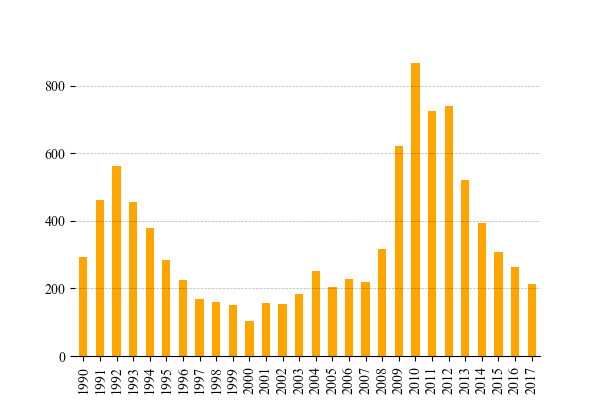

In [31]:
groups = df3_9618.groupby(['year']).size()
ax = groups.plot.bar(color = 'orange',figsize=(6,4))
#ax.set_frame_on(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('')
plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)

In [32]:
df3.columns

Index(['Column', 'Unnamed: 0', 'Action Type', 'Attachment', 'Attachment Link',
       'Bank City', 'Bank Name', 'Bank State', 'CMP Amount Aggregate',
       'Category', 'Cert Number', 'Column2', 'Docket Number', 'Issued Date',
       'Respondent', 'Restitution', 'Termination Date', 'Text', 'filename',
       'fnamefromlink', 'path', 'year', 'month'],
      dtype='object')

In [33]:
df3_9618[df3_9618['Action Type_new']!='NA'].shape

(9598, 25)

<IPython.core.display.Javascript object>


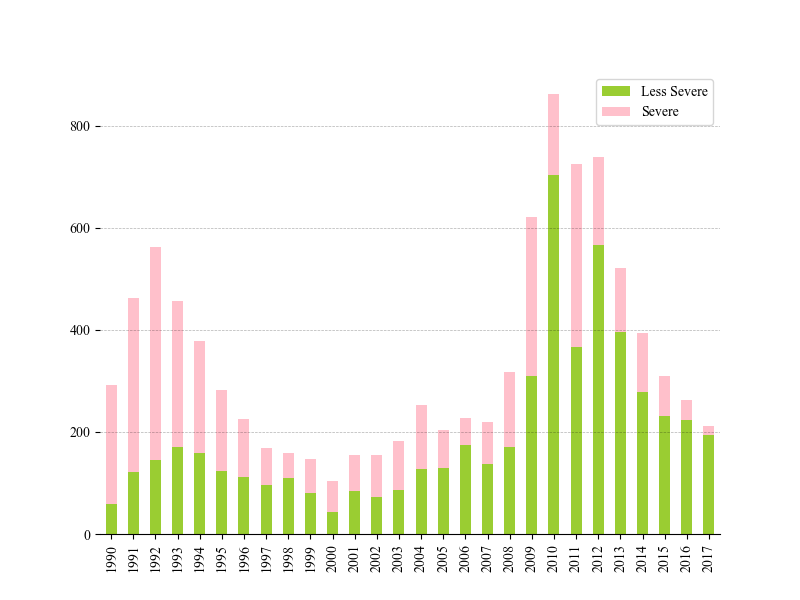

In [34]:
#plt.figure(figsize=(20,10))
group = df3_9618[df3_9618['Action Type_new']!='NA'].groupby(['year', 'Action Type_new'])['month'].count().unstack('Action Type_new')
ax1 = group.plot(kind='bar', stacked=True,figsize=(8,6),color = ['yellowgreen','pink'])
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.legend(title=None)
ax1.set_xlabel('')
plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)

#plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)
#plt.spines['right'].set_visible(False)
#plt.spines['top'].set_visible(False)

In [35]:
tps = df3_9618[df3_9618['Action Type_new']!='NA'].pivot_table(values=['Column'], 
                      index='year',
                      columns='Action Type_new',
                      aggfunc='sum')

tps = tps.div(tps.sum(1), axis=0)
#tps.plot(kind='bar', stacked=True)

In [36]:
#df1 = tps['Column']
#ax = df1.plot(kind='bar',stacked=True)

In [37]:
#ax1 = ax.patches,df1['Less Severe'].round(2)*100
#ax2 = ax.patches,df1['Severe'].round(2)*100

<IPython.core.display.Javascript object>


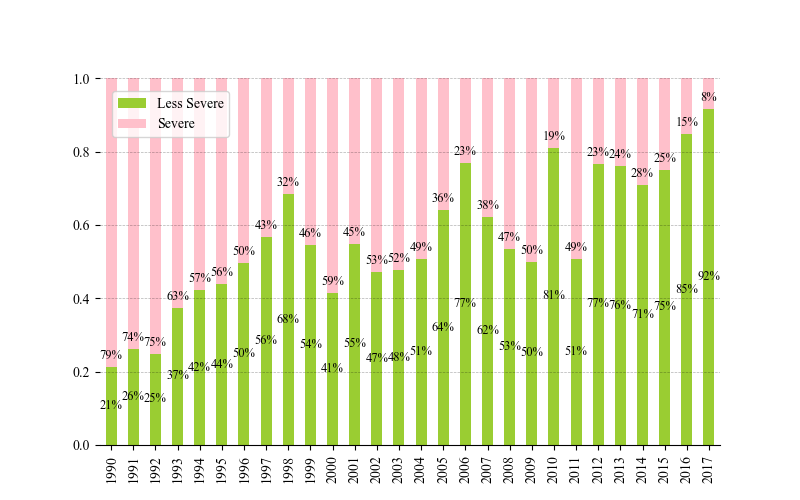

In [38]:
df1 = tps['Column']
ax3 = df1.plot(kind='bar',stacked=True, figsize=(8,5), color = ['yellowgreen','pink'])
#ax.patches,df1['Less Severe'].round(2)*100
axls = zip(ax3.patches,df1['Less Severe'].round(2)*100)#.astype(str))
axs= zip(ax3.patches,df1['Severe'].round(2)*100)#.astype(str))

ax3.spines['left'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.set_xlabel('')

for rec, label in axls:
    height = rec.get_height()
    ax3.text(rec.get_x() + rec.get_width() / 2, height/2, "%d" % label+'%',
      ha = 'center', va='center',color="black", fontsize=9)
          
for rec2, label2 in axs:
    height2 = rec2.get_height()
    ax3.text(rec2.get_x() + rec2.get_width() / 2, height2 + 0.03,"%d" % label2+'%',
       ha = 'center', va='center',color="black", fontsize=9)
    
plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)    
plt.legend(title=None, loc = (0.02,0.80))

In [297]:
for r1, r2 in zip(ax1, ax2):
    h1 = r1.get_height()
    h2 = r2.get_height()
    plt.text(r1.get_x() + r1.get_width() / 2.,
             h1 / 2., "%d" % h1, ha="center", va="bottom", 
             color="white", fontsize=16, fontweight="bold")
    plt.text(r2.get_x() + r2.get_width() / 2., 
             h1 + h2 / 2.,
             "%d" % h2, ha="center", va="bottom", 
             color="white", fontsize=16, fontweight="bold")

In [282]:
for r1, r2 in zip(ax1, ax2):
    #print(r1)
    #print(r2)

SyntaxError: unexpected EOF while parsing (<ipython-input-282-296c0b035d59>, line 3)

In [231]:
group = df3[df3['Action Type_new']!='NA'].groupby(['year', 'Action Type_new'])['month'].count().unstack('Action Type_new')

In [234]:
g = group.div(group.sum(1), axis=0)

<IPython.core.display.Javascript object>


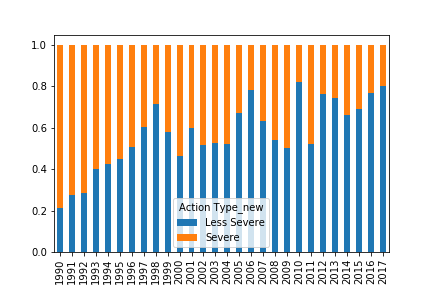

In [237]:
g.plot(kind='bar', stacked=True)

In [127]:
from stop_words import get_stop_words
en_stop = get_stop_words('en')

In [128]:
en_stop

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 "can't",
 'cannot',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 "let's",
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'ought',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'same',
 "shan't",
 'she',
 "she'd",
 "she'll",
 "she's",
 'should',
 "s

In [ ]:
groups = df3_9618.groupby(['year']).size()
ax = groups.plot.bar(color = 'orange',figsize=(8,6))
#ax.set_frame_on(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('')
plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)